In [2]:
# 오프라인 vs 온라인 매장 금 판매량 평균 비교


# 데이터 불러오기
import pandas as pd
df = pd.read_csv('ifood_df.csv', encoding = "cp949")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [4]:
# 변수명 추출
vrnm = df.columns.tolist()
print(vrnm)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [9]:
# 오프라인 매장(NumStorePurchases)의 금 평균 판매량과
# 온라인 매장(NumWebPurchases)의 금 평균 판매량 비교

# 가설 : H0-오프라인 매장과 온라인 매장의 금 평균 판매량은 차이가 없을 것이다
#       H1-오프라인 매장과 온라인 매장의 금 평균 판매량은 차이가 있을 것이다

# 오프라인 매장(NumStorePurchases)의 금 평균 판매량
st_prcs = df['MntGoldProds'][df['NumStorePurchases']]
wb_prcs = df['MntGoldProds'][df['NumWebPurchases']]

# 결과
print('온라인')
print(st_prcs)
print('-' * 50)
print('오프라인')
print(wb_prcs)

온라인
4     15
2     42
10    16
4     15
6     27
      ..
4     15
5     14
13     5
10    16
4     15
Name: MntGoldProds, Length: 2205, dtype: int64
--------------------------------------------------
오프라인
8     2
1     6
8     2
2    42
5    14
     ..
9    13
8     2
2    42
6    27
3     5
Name: MntGoldProds, Length: 2205, dtype: int64


In [13]:
# t-검정 실행
# 두 집단의 평균 차이 비교

import pandas as pd
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(st_prcs, wb_prcs)

# 결과
print('t-statistic :', t_stat)
print('p-value :', p_value)

# t-값은 -6으로 wb_prcs의 평균이 더 큼
# p-값은 약 1.3의 -10승으로 0.05보다 작으므로
# 대립가설(H1)을 채택

t-statistic : -6.435200634946356
p-value : 1.3645434381328515e-10


In [15]:
# 두 집단의 평균 비교
print(st_prcs.mean())
print(wb_prcs.mean())

# wb_prcs의 금 평균 판매량이 더 큼

16.39092970521542
19.20770975056689


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


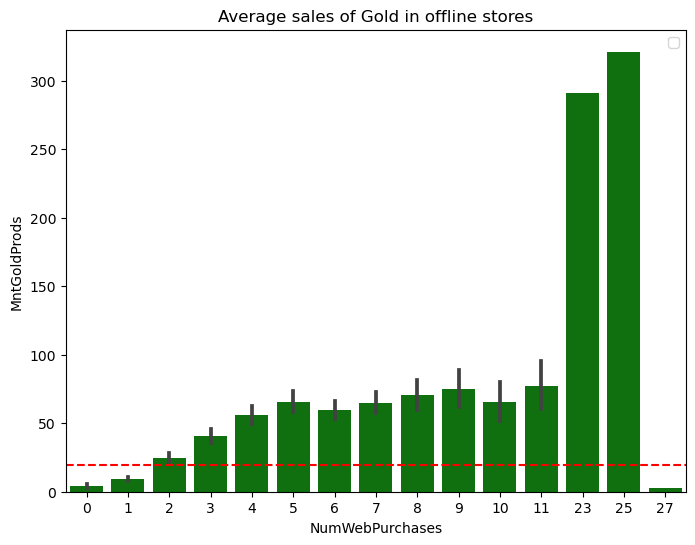

In [36]:
# 온라인 매장의 금 평균 판매량 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 온라인 매장 금 평균 판매량 계산
mean_sales = df['MntGoldProds'][df['NumWebPurchases']].mean()

# 그래프 설정
plt.figure(figsize = (8, 6))
sns.barplot(x = df['NumWebPurchases'], y = df['MntGoldProds'], color = 'green')

# 평균 라인 추가
plt.axhline(y = mean_sales, color = 'red', linestyle = '--', label = '')

# 라벨 및 제목 설정
plt.xlabel('NumWebPurchases')
plt.ylabel('MntGoldProds')
plt.title('Average sales of Gold in offline stores')
plt.legend()

# 그래프 표시
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


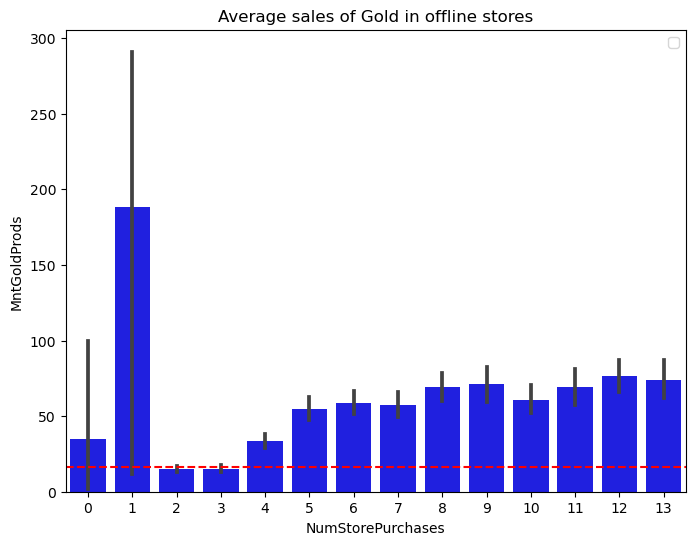

In [49]:
# 오프라인 매장의 금 평균 판매량 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 오프라인 매장 금 평균 판매량
mean_sales = df['MntGoldProds'][df['NumStorePurchases']].mean()

# 그래프 설정
plt.figure(figsize = (8, 6))
sns.barplot(x = df['NumStorePurchases'], y = df['MntGoldProds'], color = 'blue')
# 오차막대 없애기 ci = None

# 평균 라인 추가
plt.axhline(y = mean_sales, color = 'red', linestyle = '--', label = '')

# 라벨 및 제목 설정
plt.xlabel('NumStorePurchases')
plt.ylabel('MntGoldProds')
plt.title('Average sales of Gold in offline stores')
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# 결론 :
# 온라인 매장과 오프라인 매장의 금 평균 판매량은 차이가 있다
# 금 평균 판매량 :
# 오프라인 매장 < 온라인 매장
# 오프라인 매장의 금 판매량을 늘리는 방법은?

# Insight :
# 오프라인 매장의 장점은 물건(금)을 실제로 보고 느낄 수 있는 것
# 백화점 같이 유동인구가 많은 장소에 매장을 설치하는 것이 매출을 올릴 수 있다고 판단